Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w0, w1, w2, w3, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 30 seconds.


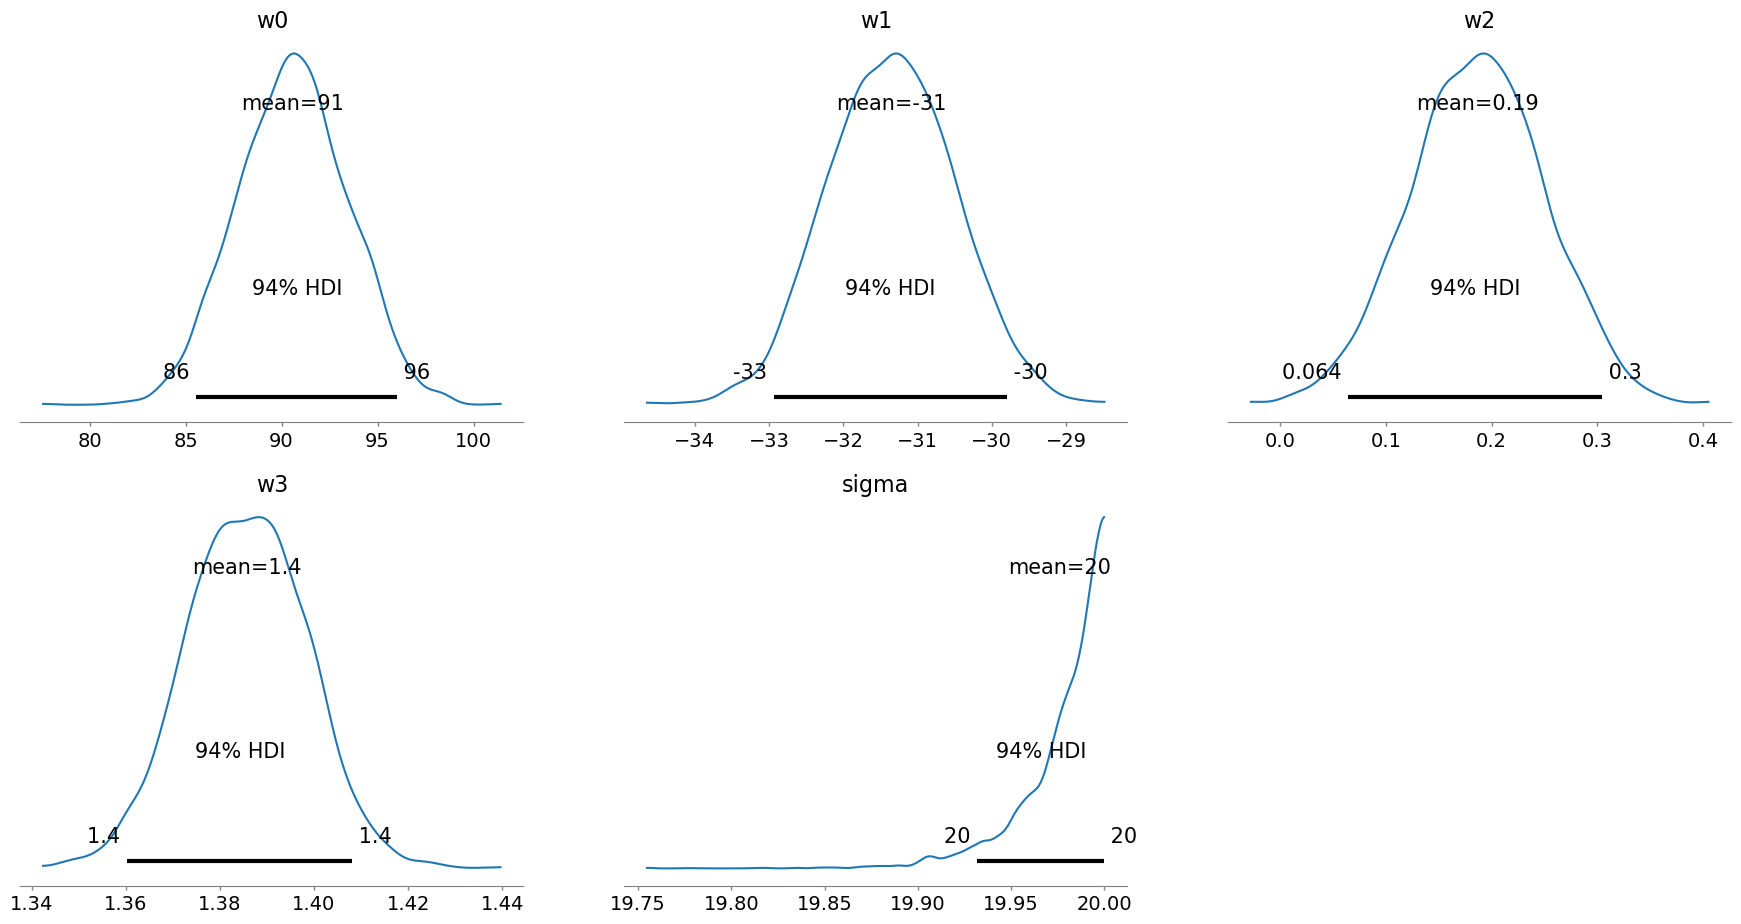

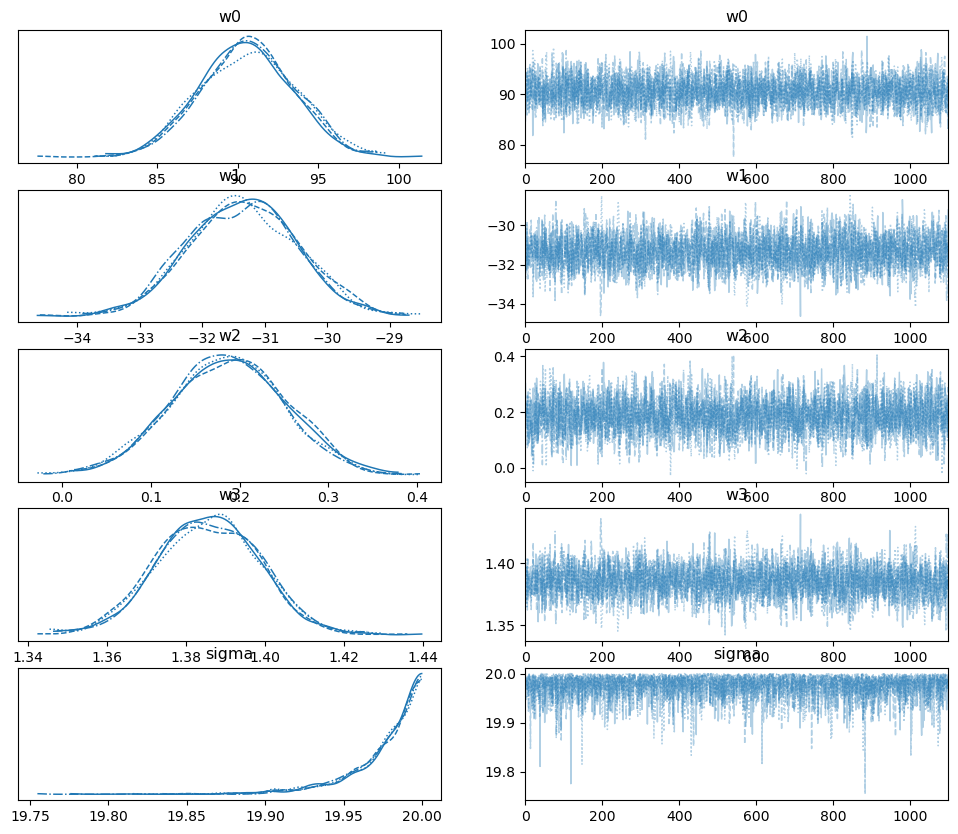

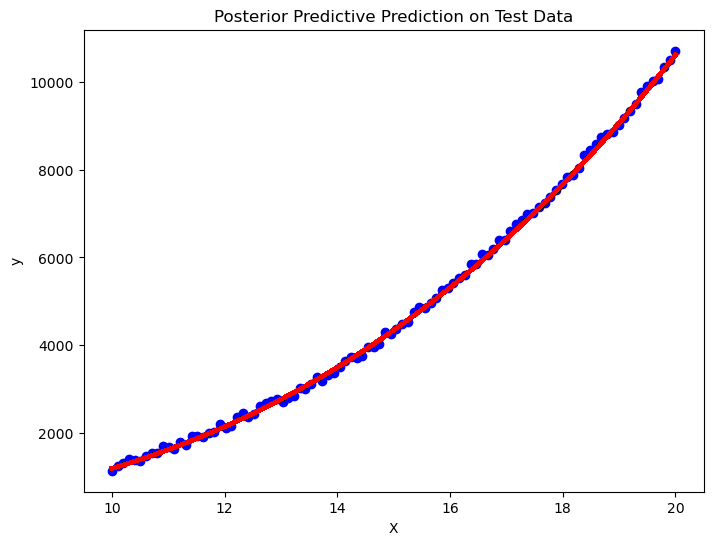

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pymc as pm
import arviz as az

data_train = np.loadtxt("regression_train.txt")
data_test = np.loadtxt("regression_test.txt")

X_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

X_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1] 

n_samples = 1100
model = pm.Model()

with model:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=20)
    w1 = pm.Normal('w1', mu=0, sigma=20)
    w2 = pm.Normal('w2', mu=0, sigma=20)
    w3 = pm.Normal('w3', mu=0, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*X_train + w2*X_train**2 + w3*X_train**3 # auxiliary variables

    likelihood = pm.Normal('y_train', mu=y_est, sigma=sigma, observed=y_train)
 
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 
    
    idata = pm.sample(n_samples, step=sampler, progressbar=True)

n_burn_in = 100
# Delete the burn-in
idata.sel(draw=slice(n_burn_in, None))

az.plot_posterior(idata)
plt.show()

az.plot_trace(idata)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c='blue')

w0_mean = idata.posterior["w0"].mean().values
w1_mean = idata.posterior["w1"].mean().values
w2_mean = idata.posterior["w2"].mean().values
w3_mean = idata.posterior["w3"].mean().values

# Plot a few posterior predictive samples

for i in range(n_samples - n_burn_in):
    y_sample = (
        w0_mean
        + w1_mean * X_test
        + w2_mean * (X_test**2)
        + w3_mean * (X_test**3)
    )
    plt.plot(X_test, y_sample, color="red", alpha=0.2, linewidth=3)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Posterior Predictive Prediction on Test Data")
plt.show()

